<a href="https://colab.research.google.com/github/Freakboy123/ASL-words-translator/blob/main/data_augmentation/media_pipe_data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import sin, cos

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Get all labels
names = []
for dir in os.listdir("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/reformatting-the-data/data_25_labels"):
    if dir !=  '.DS_Store':
        names.append(dir)
names

['research',
 'hear',
 'music',
 'brother',
 'ocean',
 'many',
 'i love you',
 'dog',
 'polite',
 'milk',
 'bookstore',
 'doctor',
 'i',
 'classroom',
 'focus',
 'money',
 'coffee',
 'book',
 'phone',
 'chicken',
 'photographer',
 'hamburger',
 'good morning',
 'open',
 'door']

In [ ]:
test_arr = np.array([[1,2,3,4],[5,6,7,8]], dtype=np.float32)
# test_arr[:,:2]
origin = np.mean(test_arr[:,:2], axis=0)
test_arr[:,:2] -= origin
origin, test_arr

(array([3., 4.], dtype=float32),
 array([[-2., -2.,  3.,  4.],
        [ 2.,  2.,  7.,  8.]], dtype=float32))

In [ ]:
test_arr[:,2] = 1
test_arr

array([[-2., -2.,  1.,  4.],
       [ 2.,  2.,  1.,  8.]], dtype=float32)

In [ ]:
test_arr[:, 1]

array([-2.,  2.], dtype=float32)

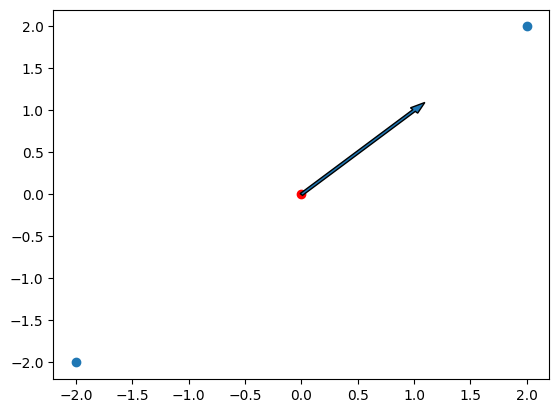

In [ ]:
plt.scatter(test_arr[:,0], test_arr[:, 1])
plt.scatter(0, 0, c="red")
plt.arrow(0,0,1,1, width=0.03)
plt.show()

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ASL_data_aug/media_pipe_data.csv")
df

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z73,v73,x74,y74,z74,v74,x75,y75,z75,v75
0,0.551000,0.137201,-0.389623,0.999333,0.563061,0.096713,-0.365614,0.998801,0.571207,0.096579,...,-0.024982,0.0,0.511601,0.596148,-0.018471,0.0,0.522756,0.590431,-0.012709,0.0
1,0.551263,0.137491,-0.599251,0.999367,0.563445,0.097272,-0.579636,0.998870,0.571972,0.097066,...,-0.024671,0.0,0.515144,0.602914,-0.016651,0.0,0.526639,0.598563,-0.010476,0.0
2,0.551299,0.137634,-0.580877,0.999395,0.563522,0.097499,-0.557771,0.998936,0.572214,0.097148,...,-0.022818,0.0,0.516246,0.604156,-0.014529,0.0,0.527088,0.599403,-0.008186,0.0
3,0.551316,0.137765,-0.665241,0.999437,0.563553,0.097863,-0.641277,0.999020,0.572347,0.097286,...,-0.020360,0.0,0.515703,0.604573,-0.011119,0.0,0.526687,0.600712,-0.004170,0.0
4,0.551629,0.137767,-0.637008,0.999478,0.563631,0.097861,-0.610989,0.999101,0.572541,0.097178,...,-0.022453,0.0,0.515289,0.604110,-0.013184,0.0,0.526383,0.600324,-0.006168,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.543555,0.134785,-0.568796,0.999766,0.556483,0.092250,-0.550456,0.999630,0.566348,0.090431,...,-0.023591,0.0,0.507452,0.612280,-0.015069,0.0,0.518543,0.609027,-0.008547,0.0
66,0.543352,0.135437,-0.549780,0.999777,0.556255,0.092668,-0.532304,0.999645,0.566099,0.090881,...,-0.019729,0.0,0.507137,0.614144,-0.011554,0.0,0.518027,0.610138,-0.005417,0.0
67,0.543219,0.136159,-0.557423,0.999781,0.556032,0.093018,-0.538903,0.999651,0.565806,0.091271,...,-0.020502,0.0,0.505992,0.615600,-0.012266,0.0,0.516854,0.610965,-0.006057,0.0
68,0.543214,0.136232,-0.565918,0.999782,0.555989,0.093025,-0.547056,0.999650,0.565745,0.091274,...,-0.017624,0.0,0.509058,0.616063,-0.009167,0.0,0.519582,0.611696,-0.002924,0.0


In [ ]:
#test

frame = df.iloc[0].to_numpy()
frame = frame.reshape((75, 4))
frame[0]
# new_frame = rotate(frame, 5)
# print(new_frame[0])
# print(frame[0])

array([ 0.55099976,  0.13720125, -0.38962263,  0.99933296])

In [4]:
all_frames = df.to_numpy().reshape((70, 75, 4))
all_frames[0][0]

array([ 0.55099976,  0.13720125, -0.38962263,  0.99933296])

In [5]:
def change_origin(frame):
  new_origin = np.mean(frame[:,:2], axis=0)
  # print(new_origin.shape)
  new_frame = np.copy(frame)
  new_frame[:,:2] -= new_origin
  return frame, new_frame 

In [6]:
def visualize_rotation(func):

  def wrap(*args, **kwargs):
    original_frame, new_frame = func(*args, **kwargs)
    plt.scatter(original_frame[:, 0], original_frame[:, 1], c="blue", label="original_data")
    plt.scatter(new_frame[:, 0], new_frame[:, 1], c="red", label="new data")
    plt.scatter(0, 0, c="black")
    plt.annotate("origin", (0,0))
    plt.arrow(0, 0, original_frame[0][0], original_frame[0][1], length_includes_head=True, color="blue", head_width=0.03)
    plt.arrow(0, 0, new_frame[0][0], new_frame[0][1], length_includes_head=True, color="red", head_width=0.03)
    plt.legend()
    return original_frame, new_frame

  return wrap

In [7]:
def visualize(frame):
    coordsX = []
    coordsY = []
    for i in range(frame.shape[0]):
        coordsX.append((frame[i][0]))
        coordsY.append((frame[i][1]))
    plt.scatter(coordsX, coordsY)


In [8]:
@visualize_rotation
def rotate(frame, angle, origin=[0, 0]):
    normalized_frame = change_origin(frame)
    angle_rad = math.radians(angle)
    new_frame = np.copy(frame)
    rotation_matrix = np.array([[cos(angle_rad), -sin(angle_rad)], [sin(angle_rad), cos(angle_rad)]])
    for i in range(len(new_frame)):
        new_frame[i][:2] = np.matmul(rotation_matrix, new_frame[i][:2])
    return frame, new_frame

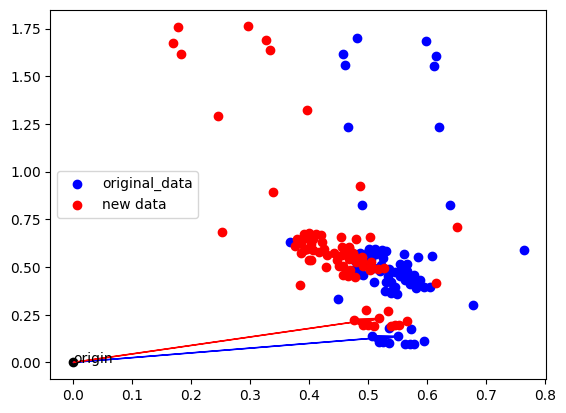

In [9]:
#rotation without changing origin
_, f1 = rotate(all_frames[0], 10)

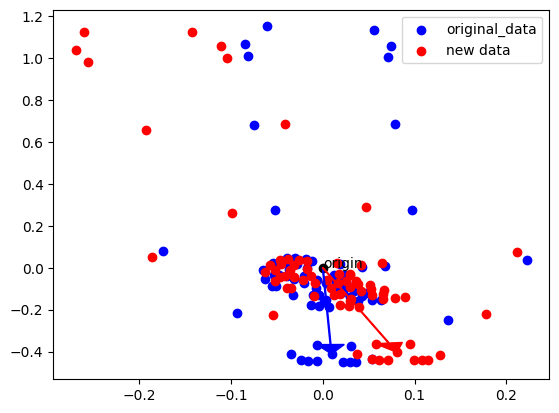

In [10]:
_, frame = change_origin(all_frames[0])
_, _=rotate(frame, 10)

In [24]:
class VectorTransformation():

  def __init__(self, center_data=True, translation_x=0, translation_y=0, rotation_angle=0, 
               shear_x=0, shear_y=0, scaling_x=1, scaling_y=1, reflection=True):
    self.center = center_data
    self.tx = translation_x
    self.ty = translation_y
    self.angle = math.radians(rotation_angle)
    self.shx = shear_x
    self.shy = shear_y
    self.scale_x = scaling_x
    self.scale_y = scaling_y
    self.reflect = reflection

  def translation_matrix(self):
    return np.array([[1, 0, self.tx],
                    [0, 1, self.ty],
                    [0, 0, 1]])

  def rotation_matrix(self):
    return np.array([[cos(self.angle), -sin(self.angle), 0], 
                       [sin(self.angle), cos(self.angle), 0],
                       [0, 0, 1]])

  def shearx_matrix(self):
    return np.array([[1, self.shx, 0],
                     [0, 1, 0], 
                     [0, 0, 1]])
    
  def sheary_matrix(self):
    return np.array([[1, 0, 0],
                     [self.shy, 1, 0],
                     [0, 0, 1]])
    
  def scaling_matrix(self):
    return np.array([[self.scale_x, 0, 0],
                     [0, self.scale_y, 0], 
                     [0, 0, 1]])
    
  def reflection_matrix(self):
    return np.array([[1, 0, 0],
                     [0, (-1)**(int(self.reflect)), 0], 
                     [0, 0, 1]])
    
  def change_origin(self, frame):
    new_origin = np.mean(frame[:,:2], axis=0)
    new_frame = np.copy(frame)
    new_frame[:,:2] -= new_origin
    return new_frame 

In [13]:
def add_to_class(Class):  
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [68]:
@add_to_class(VectorTransformation)
def transform(self, frame):
    new_frame = np.copy(frame)
    new_frame[:, 2] = 1



    for i in range(len(new_frame)):
        new_frame[i][:3] = np.matmul(self.reflection_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.translation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.shearx_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.sheary_matrix(), new_frame[i][:3])

        if self.center:
            new_frame = self.change_origin(new_frame)

        new_frame[i][:3] = np.matmul(self.rotation_matrix(), new_frame[i][:3])
        # new_frame[i][:3] = np.matmul(self.shearx_matrix(), new_frame[i][:3])
        # new_frame[i][:3] = np.matmul(self.sheary_matrix(), new_frame[i][:3])
      
        new_frame[i][:3] = np.matmul(self.scaling_matrix(), new_frame[i][:3])

    new_frame[:, 2] = frame[:, 2]
        
    return new_frame


In [27]:
@add_to_class(VectorTransformation)
def visualize_change(self, original_frame, new_frame):
    plt.title(f"translation: ({self.tx}, {self.ty})\nrotation: {self.angle},\n shear: ({self.shx}, {self.shy})\n scaling: ({self.scale_x}, {self.scale_y})")
    plt.scatter(original_frame[:, 0], original_frame[:, 1], c="blue", label="original_data")
    plt.scatter(new_frame[:, 0], new_frame[:, 1], c="red", label="new data")
    plt.scatter(0, 0, c="black")
    plt.annotate("origin", (0,0))
    plt.arrow(0, 0, original_frame[0][0], original_frame[0][1], length_includes_head=True, color="blue", head_width=0.03)
    plt.arrow(0, 0, new_frame[0][0], new_frame[0][1], length_includes_head=True, color="red", head_width=0.03)
    plt.legend()

In [75]:
data_aug = VectorTransformation(shear_x=0.2, reflection=False, center_data=True)
new_frame = data_aug.transform(all_frames[0])
# new_frame

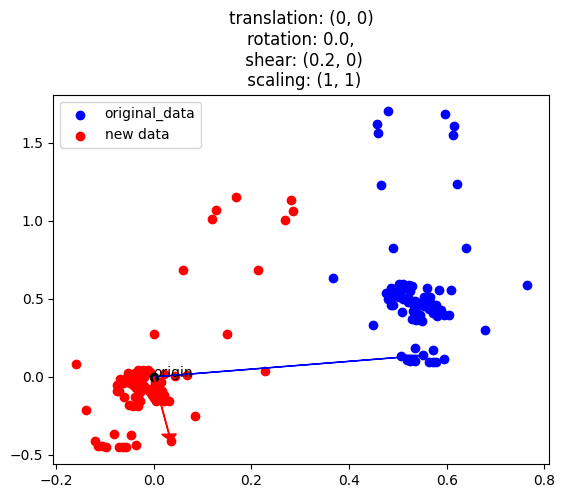

In [80]:
_, frame = change_origin(new_frame)
data_aug.visualize_change(all_frames[0], frame)

##random funcitons


In [81]:
import random 

@add_to_class(VectorTransformation)
def random_translation_matrix(self):
    return np.array([[1, 0, random.uniform(0, self.tx)],
                         [0, 1, self.ty],
                         [0, 0, 1]])

@add_to_class(VectorTransformation)
def random_rotation_matrix(self):
    return np.array([[cos(random.uniform(0, self.angle)), -sin(random(0,self.angle)), 0], 
                    [sin(random.uniform(0, self.angle)), cos(random.uniform(0, self.angle)), 0],
                    [0, 0, 1]])
  
@add_to_class(VectorTransformation)
def random_shearx_matrix(self):
    return np.array([[1, random.uniform(0, self.shx), 0],
                     [0, 1, 0], 
                     [0, 0, 1]])
    
@add_to_class(VectorTransformation)
def random_sheary_matrix(self):
  return np.array([[1, 0, 0],
                  [random.uniform(0, self.shy), 1, 0],
                  [0, 0, 1]])
    
@add_to_class(VectorTransformation)
def random_scaling_matrix(self):
  return np.array([[random.uniform(1, self.scale_x), 0, 0],
                  [0, random(1, self.scale_y), 0], 
                  [0, 0, 1]])

In [93]:
@add_to_class(VectorTransformation)
def random_transform(self, frame):
    new_frame = np.copy(frame)
    new_frame[:, 2] = 1

    #centering
    if self.center:
      new_frame = self.change_origin(frame)

    for i in range(len(new_frame)):
        new_frame[i][:3] = np.matmul(self.reflection_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_translation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_rotation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_shearx_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_sheary_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.random_scaling_matrix(), new_frame[i][:3])

    new_frame[:, 2] = frame[:, 2]
        
    return new_frame

In [94]:
@add_to_class(VectorTransformation)
def get_new_data(self, frames: list[[]], ratio, random=True):
  new_data = []
  new_labels = []
  for i in range(len(frames)):
    for j in range(ratio):
      if random:
        new_data.append(self.random_transform(frames[i]))
        # new_labels.append(labels[i])
      else:
        new_data.append(self.transform(frames[i]))
        # new_labels.append(labels[i])


  return new_data, new_labels

##generating data

In [95]:
data_augmentation = VectorTransformation(translation_x=0.1, translation_y=0.1, shear_x=0.1, shear_y=0.1, reflection=True,
                                         rotation_angle=20, center_data=True)

new_data = data_augmentation.get_new_data(all_frames, 2)

TypeError: ignored